In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
cols = ['loc_string','loc_string_hole','Permanent_Tournament_#','Course_#',
        'Round','Hole','Player_#','Shot','End_X_Coordinate','End_Y_Coordinate','Cluster',
        'Start_X_Coordinate','Cluster_Green_X','Start_Y_Coordinate','Cluster_Green_Y',
        'Cluster_Tee_Y','Cluster_Tee_X','last_shot_mask','Year']

# cols = ['Course_#','Hole','Cluster','Cluster_Green_X','Cluster_Green_Y','from_the_tee_box_mask',
#         'Cluster_Tee_Y','Cluster_Tee_X','Start_X_Coordinate','Start_Y_Coordinate']

In [3]:
data = pd.concat([pd.read_csv('data/%d.csv' % year, usecols=cols)
                  for year in range(2003,2018)])

In [2]:
data = pd.read_csv('blah.csv')

In [13]:
data.columns

Index([u'Year', u'Player_#', u'Course_#', u'Permanent_Tournament_#', u'Round',
       u'Hole', u'Shot', u'End_X_Coordinate', u'End_Y_Coordinate',
       u'Start_X_Coordinate', u'Start_Y_Coordinate', u'last_shot_mask',
       u'Cluster', u'Cluster_Green_X', u'Cluster_Green_Y', u'Cluster_Tee_X',
       u'Cluster_Tee_Y', u'loc_string', u'loc_string_hole'],
      dtype='object')

In [25]:
for u,((course,hole,cluster),df) in enumerate(data.groupby(['Course_#','Hole','Cluster'])):
    if u==71: break

In [26]:
sub = df[(df.last_shot_mask)]

In [27]:
df = sub

In [28]:
df = df.sample(n=100,replace=False,axis=0)

In [29]:
def rotate_theta_radians(points,theta):
    points = np.array(points).T
    r = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    return np.dot(r,points).T
    
def convert_to_degrees(angle):
    if isinstance(angle,float):
        angle = angle + (2*np.pi if angle<0 else 0)
    else:
        angle[angle<0] = angle[angle<0] + 2*np.pi
    return np.degrees(angle)

points = np.column_stack([df.Start_X_Coordinate.values - df.Cluster_Green_X.values[0],
                          df.Start_Y_Coordinate.values - df.Cluster_Green_Y.values[0]])
angle_of_tee_box = np.arctan2(df.Cluster_Tee_Y.values[0] - df.Cluster_Green_Y.values[0],
                              df.Cluster_Tee_X.values[0] - df.Cluster_Green_X.values[0])
rotated = rotate_theta_radians(points,3*np.pi/2-angle_of_tee_box)
angles = convert_to_degrees(np.arctan2(rotated[:,1],rotated[:,0]))
distances_from_origin = (rotated**2).sum(1)**.5

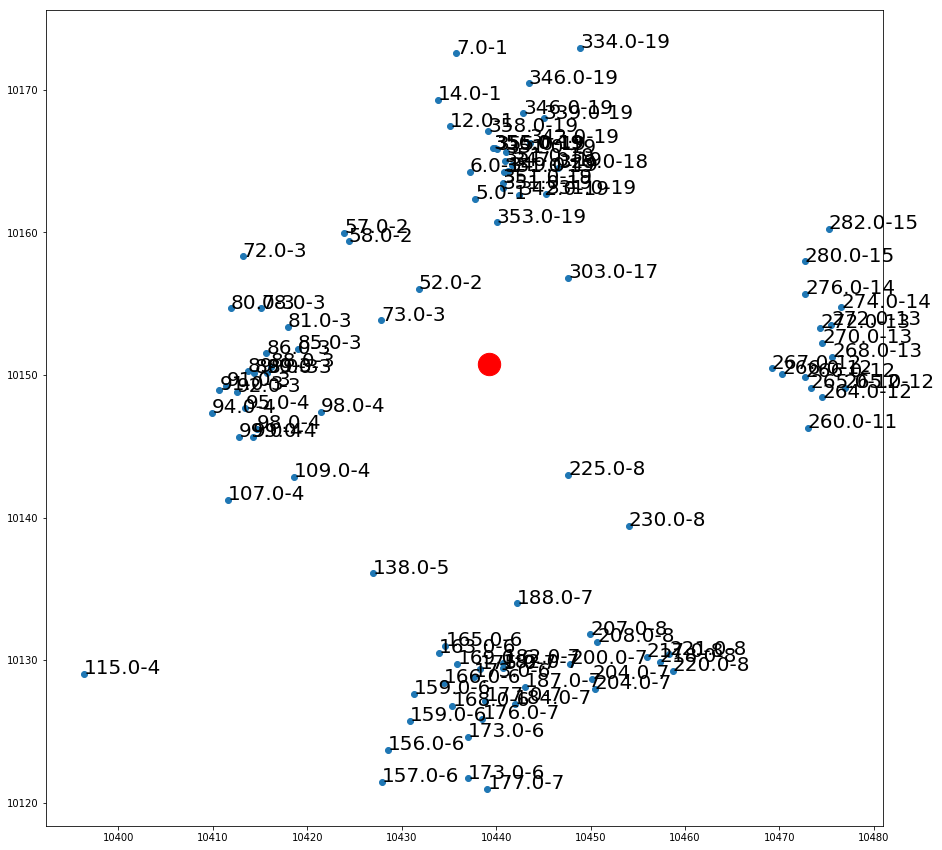

In [30]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
for u,(x_,y_,ang,l) in enumerate(zip(df.Start_X_Coordinate.values,
                                     df.Start_Y_Coordinate.values,
                                     angles,
                                     df.loc_string.values)):
    plt.text(x_,y_,str(round(ang)) +'-'+ l.split('-')[2],fontsize=20)
plt.scatter(df.Start_X_Coordinate.values,df.Start_Y_Coordinate.values);
plt.scatter(df.Cluster_Green_X.values[0],df.Cluster_Green_Y.values[0],s=500,c='r');

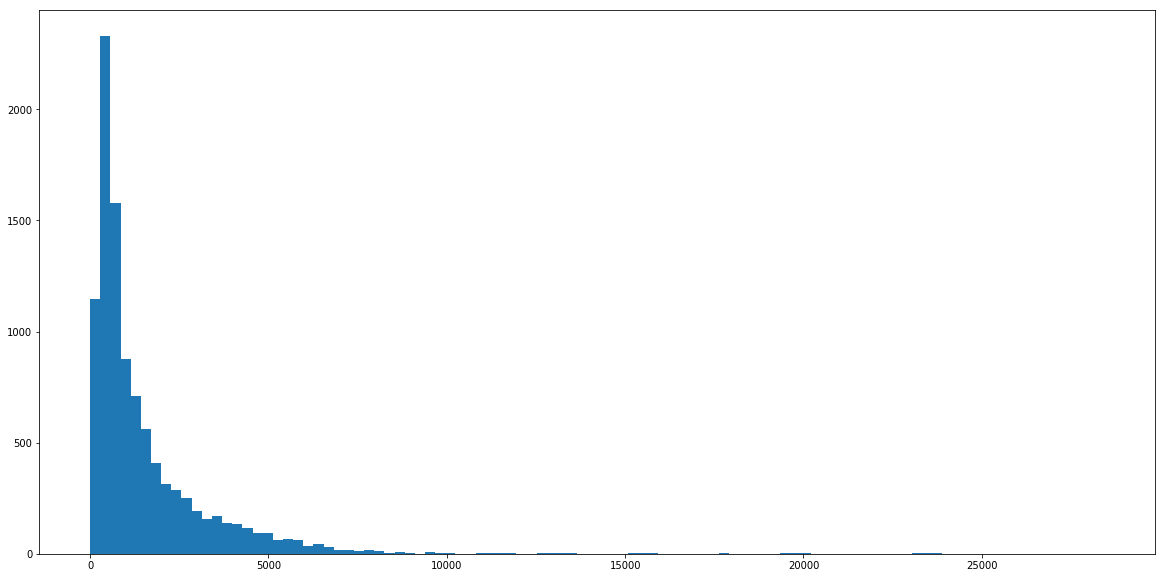

In [31]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
plt.hist(data.loc_string_hole.value_counts().values,bins=100);

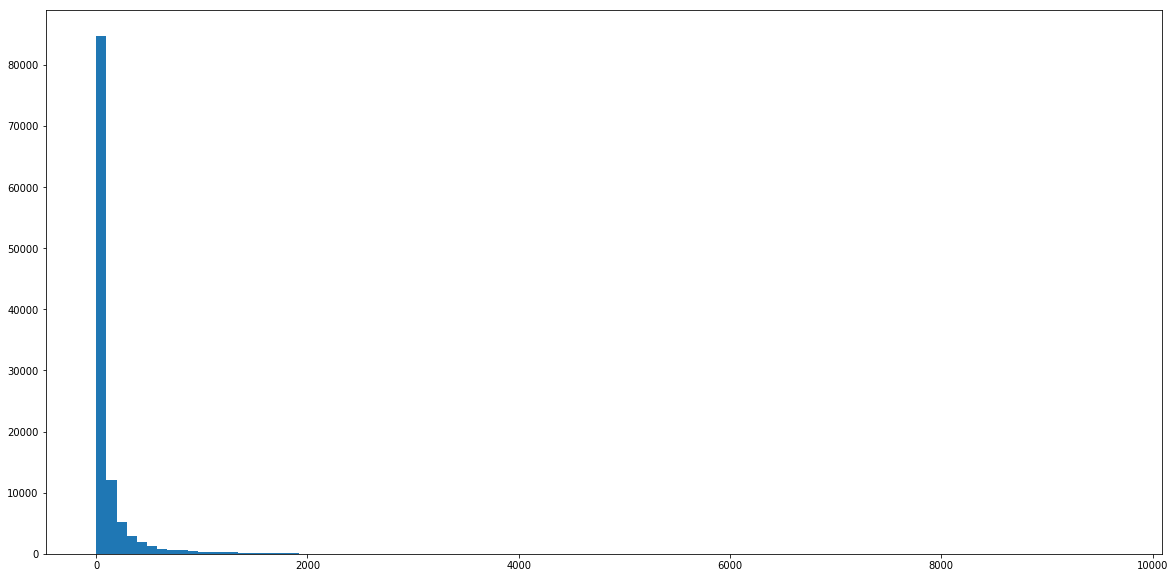

In [32]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
plt.hist(data.loc_string.value_counts().values,bins=100);

In [33]:
p = np.percentile(data.loc_string_hole.value_counts().values,np.linspace(0,100,1000))

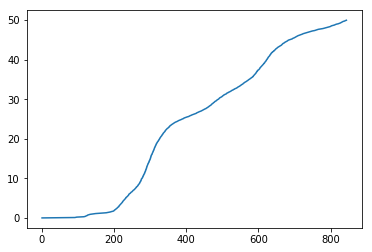

In [34]:
plt.plot(p[0:500],np.linspace(0,100,1000)[0:500]);

In [35]:
p = np.percentile(data.loc_string.value_counts().values,np.linspace(0,100,1000))

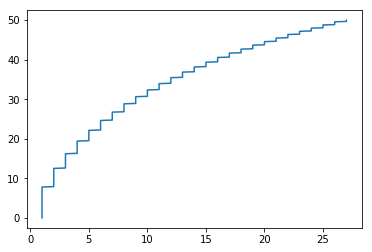

In [36]:
plt.plot(p[0:500],np.linspace(0,100,10a00)[0:500]);

In [37]:
len(pd.unique(data.loc_string)),len(pd.unique(data.loc_string_hole))

(113191, 10018)

In [39]:
data.loc_string.value_counts()

510-12-1-6     9605
510-14-17-6    9572
510-7-5-6      9490
510-2-18-6     9424
510-3-3-6      9357
510-8-16-6     9285
510-5-2-6      9203
510-1-5-6      9101
510-11-4-6     8952
510-4-6-6      8939
510-10-2-6     8878
510-18-6-6     8625
12-15-1-3      8285
12-8-18-3      7687
510-15-11-6    7674
12-11-5-3      7489
660-4-1-4      7408
510-16-9-6     7396
510-13-4-6     7294
12-4-6-3       7289
12-18-19-3     7189
12-3-7-3       7002
513-16-13-9    6890
513-9-13-8     6862
513-4-13-6     6856
513-3-13-9     6853
513-1-13-8     6795
660-17-19-4    6762
513-17-13-9    6705
513-15-13-7    6702
               ... 
714-6-10-6        1
714-6-10-5        1
714-6-10-4        1
625-14-1-4        1
730-5-13-4        1
503-10-3-4        1
512-12-10-4       1
710-4-17-4        1
692-8-8-3         1
19-12-14-5        1
240-5-7-2         1
687-10-18-4       1
726-5-18-3        1
19-16-15-6        1
656-15-18-2       1
692-8-18-3        1
513-18-14-7       1
32-1-18-4         1
698-17-1-4        1
